# Practice 8 - k-Means and Hierarchical Clustering

We will work again on the iris data set. The data have labels here, but we will check if unsupervised learning can make good guesses.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

In [2]:
dataset = pd.read_csv('iris.csv')

*This small dataset from 1936 is often used for testing out machine learning algorithms and visualizations. Each row of the table represents an iris flower, including its species and dimensions of its botanical parts, sepal and petal, in centimeters.*

In [3]:
dataset.sample(n=5)

,sepal_length,sepal_width,petal_length,petal_width,species
148,6.2,3.4,5.4,2.3,virginica
131,7.9,3.8,6.4,2.0,virginica
95,5.7,3.0,4.2,1.2,versicolor
132,6.4,2.8,5.6,2.2,virginica
117,7.7,3.8,6.7,2.2,virginica


## Your Task

* Plot **sepal width** vs. **sepal length** with colors corresponding to the species
* Train a k-Means model for 3 clusters and plot the results.
* Train a Hierarchical Clustering model for 3 clusters and plot the results. Compare different linkage methods.
* Do again the first three steps now with **petal width** vs. **petal length**
* Visually, which 2D plane seems to be the most convenient for clustering?

### Plot sepal width vs. sepal length with colors corresponding to the species

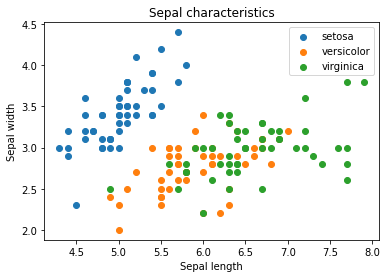

In [4]:
# unique_species = dataset['species'].unique()


# for variety in unique_species:
#     subset = dataset[dataset['species'] == variety]
    
#     plt.scatter(subset['sepal_length'], subset['sepal_width'], label=variety)
    
# plt.title('Sepal characteristics')
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')
# plt.legend()
# plt.show()

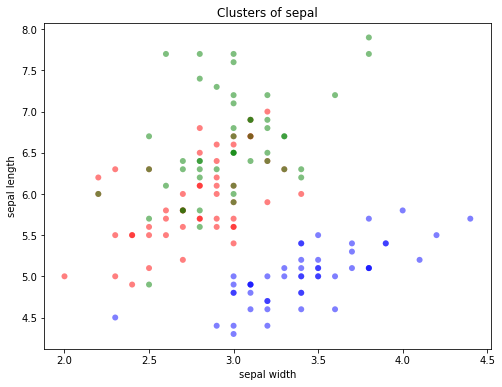

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(dataset['sepal_width'], dataset['sepal_length'], c = dataset['species'].replace({'setosa':'blue', 'versicolor':'red', 'virginica':'green'}), alpha=0.5, lw=0)
plt.title('Clusters of sepal')
plt.xlabel('sepal width')
plt.ylabel('sepal length')
plt.show()

### Train a k-Means model for 3 clusters and plot the results.

In [6]:
X = dataset[['sepal_width', 'sepal_length']]
X.head()

,sepal_width,sepal_length
0,3.5,5.1
1,3.0,4.9
2,3.2,4.7
3,3.1,4.6
4,3.6,5.0


In [7]:
k = 3

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = k, random_state = 0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [8]:
y_pred = kmeans.predict(X)
print(y_pred[:150])
np.unique(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 2 2 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


array([0, 1, 2], dtype=int32)

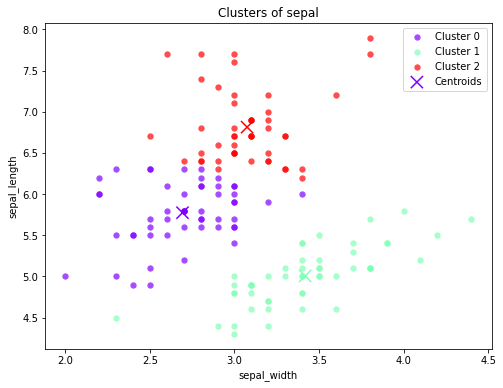

In [9]:
plt.figure(figsize=(8,6))
color_list = plt.cm.get_cmap('rainbow', k)
  
# Plot data points with color corresponding to their cluster attribution
for i in range(k):
    plt.scatter(X.iloc[y_pred == i, 0], X.iloc[y_pred == i, 1], s = 40, color = color_list(i), alpha=0.7, lw=0, label = 'Cluster ' + str(i))

# Plot final centroid of each cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, marker = 'x', c = [color_list(i) for i in range(k)], label = 'Centroids')

plt.title('Clusters of sepal')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.legend()
plt.show()

### Train a Hierarchical Clustering model for 3 clusters and plot the results. Compare different linkage methods.

In [10]:
k = 3
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'average')
y_hc = hc.fit_predict(X)

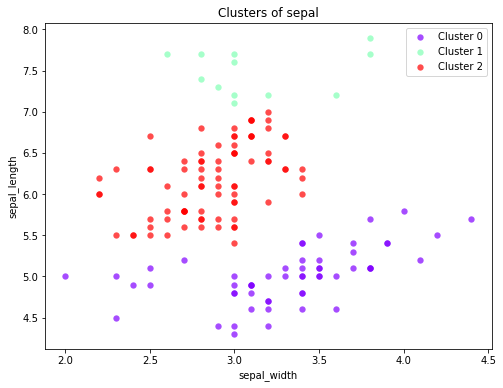

In [11]:
plt.figure(figsize=(8,6))
color_list = plt.cm.get_cmap('rainbow', k)
  
# Plot data points with color corresponding to their cluster attribution
for i in range(k):
    plt.scatter(X.iloc[y_hc == i, 0], X.iloc[y_hc == i, 1], s = 40, color = color_list(i), alpha=0.7, lw=0, label = 'Cluster ' + str(i))

plt.title('Clusters of sepal')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.legend()
plt.show()

In [12]:
hc = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(X)

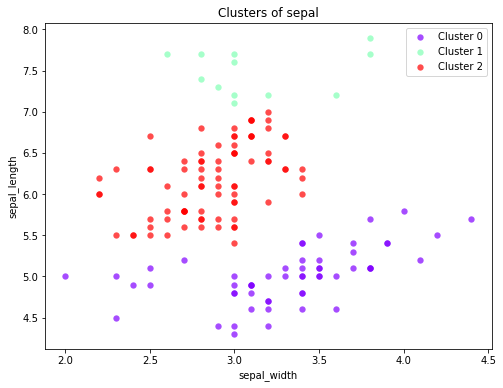

In [23]:
plt.figure(figsize=(8,6))
color_list = plt.cm.get_cmap('rainbow', k)
  
# Plot data points with color corresponding to their cluster attribution
for i in range(k):
    plt.scatter(X.iloc[y_hc == i, 0], X.iloc[y_hc == i, 1], s = 40, color = color_list(i), alpha=0.7, lw=0, label = 'Cluster ' + str(i))

plt.title('Clusters of sepal')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.legend()
plt.show()

### Do again the first three steps now with petal width vs. petal length

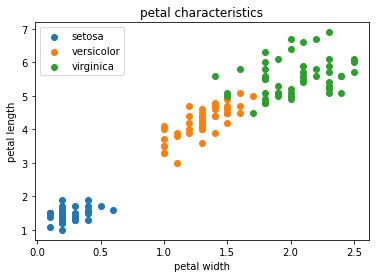

In [15]:
# unique_species = dataset['species'].unique()


# for variety in unique_species:
#     subset = dataset[dataset['species'] == variety]
    
#     plt.scatter(subset['petal_width'], subset['petal_length'], label=variety)
    
# plt.title('petal characteristics')
# plt.xlabel('petal width')
# plt.ylabel('petal length')
# plt.legend()
# plt.show()

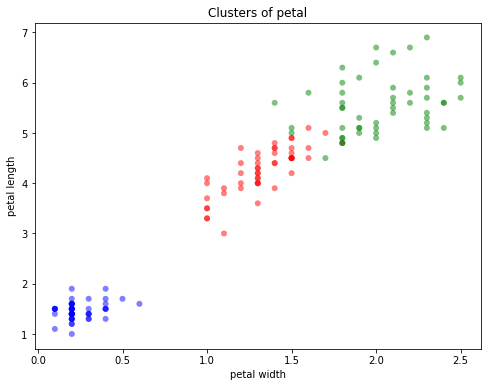

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(dataset['petal_width'], dataset['petal_length'], c = dataset['species'].replace({'setosa':'blue', 'versicolor':'red', 'virginica':'green'}), alpha=0.5, lw=0)
plt.title('Clusters of petal')
plt.xlabel('petal width')
plt.ylabel('petal length')
plt.show()

In [16]:
X1 = dataset[['petal_width', 'petal_length']]
X1.head()

,petal_width,petal_length
0,0.2,1.4
1,0.2,1.4
2,0.2,1.3
3,0.2,1.5
4,0.2,1.4


#### k-Means model

In [29]:
k = 3

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = k, random_state = 0)
kmeans.fit(X1)

KMeans(n_clusters=3, random_state=0)

In [30]:
y1_pred = kmeans.predict(X1)
print(y1_pred[:150])
np.unique(y1_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1]


array([0, 1, 2], dtype=int32)

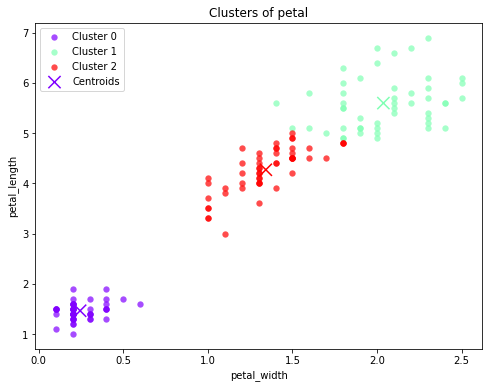

In [34]:
plt.figure(figsize=(8,6))
color_list = plt.cm.get_cmap('rainbow', k)
  
# Plot data points with color corresponding to their cluster attribution
for i in range(k):
    plt.scatter(X1.iloc[y1_pred == i, 0], X1.iloc[y1_pred == i, 1], s = 40, color = color_list(i), alpha=0.7, lw=0, label = 'Cluster ' + str(i))

# Plot final centroid of each cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, marker = 'x', c = [color_list(i) for i in range(k)], label = 'Centroids')

plt.title('Clusters of petal')
plt.xlabel(X1.columns[0])
plt.ylabel(X1.columns[1])
plt.legend()
plt.show()

#### Hierarchical Clustering model

In [35]:
k = 3
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'average')
y1_hc = hc.fit_predict(X1)

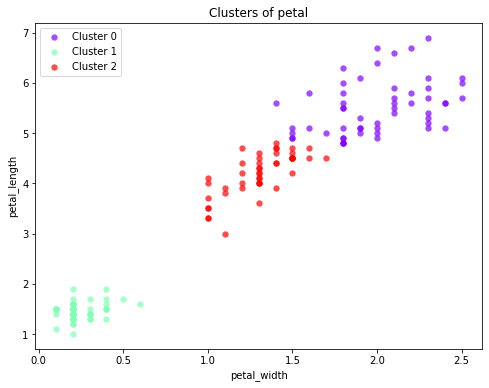

In [36]:
plt.figure(figsize=(8,6))
color_list = plt.cm.get_cmap('rainbow', k)
  
# Plot data points with color corresponding to their cluster attribution
for i in range(k):
    plt.scatter(X1.iloc[y1_hc == i, 0], X1.iloc[y1_hc == i, 1], s = 40, color = color_list(i), alpha=0.7, lw=0, label = 'Cluster ' + str(i))

plt.title('Clusters of petal')
plt.xlabel(X1.columns[0])
plt.ylabel(X1.columns[1])
plt.legend()
plt.show()

In [ ]:
hc = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'complete')
y1_hc = hc.fit_predict(X1)

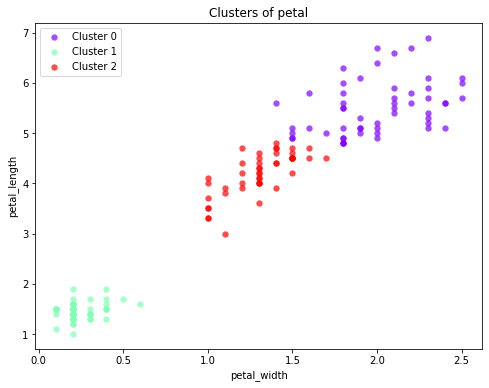

In [37]:
plt.figure(figsize=(8,6))
color_list = plt.cm.get_cmap('rainbow', k)
  
# Plot data points with color corresponding to their cluster attribution
for i in range(k):
    plt.scatter(X1.iloc[y1_hc == i, 0], X1.iloc[y1_hc == i, 1], s = 40, color = color_list(i), alpha=0.7, lw=0, label = 'Cluster ' + str(i))

plt.title('Clusters of petal')
plt.xlabel(X1.columns[0])
plt.ylabel(X1.columns[1])
plt.legend()
plt.show()

### Visually, which 2D plane seems to be the most convenient for clustering?

Visually, the second one (petal width vs. petal length) seems to be the most convinient for clustering.